In [2]:
# Import necessary libraries
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# 1. Generate a toy dataset
# Using make_moons to demonstrate HDBSCAN's ability to find non-globular clusters
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=42)

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {n_samples}")



Dataset shape: (1500, 2)
Number of samples: 1500


The make_moons function in scikit-learn is a utility for generating a synthetic dataset that is commonly used for binary classification and clustering tasks.

In [3]:
X

array([[ 0.97283794, -0.49951516],
       [ 1.84844905,  0.02504018],
       [-0.129004  ,  1.01439792],
       ...,
       [ 0.0973423 ,  0.03751807],
       [ 1.91061504,  0.33279774],
       [ 1.1039567 , -0.50641698]])

In [4]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [6]:

# 2. Initialize and fit the HDBSCAN model
# min_cluster_size: The smallest size a cluster can be.
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point.
#              This is similar to min_samples in DBSCAN.
# cluster_selection_epsilon: A distance threshold. Clusters below this threshold are merged.
#                            Set to 0.0 for automatic selection based on density.
print("\nFitting HDBSCAN model...")
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5, cluster_selection_epsilon=0.0)
clusterer.fit(X)

# 3. Extract cluster labels
# -1 indicates noise points (points not assigned to any cluster)
labels = clusterer.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # Count unique clusters, excluding noise
n_noise = list(labels).count(-1)

print(f"HDBSCAN clustering complete.")
print(f"Estimated number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")




Fitting HDBSCAN model...
HDBSCAN clustering complete.
Estimated number of clusters: 2
Number of noise points: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


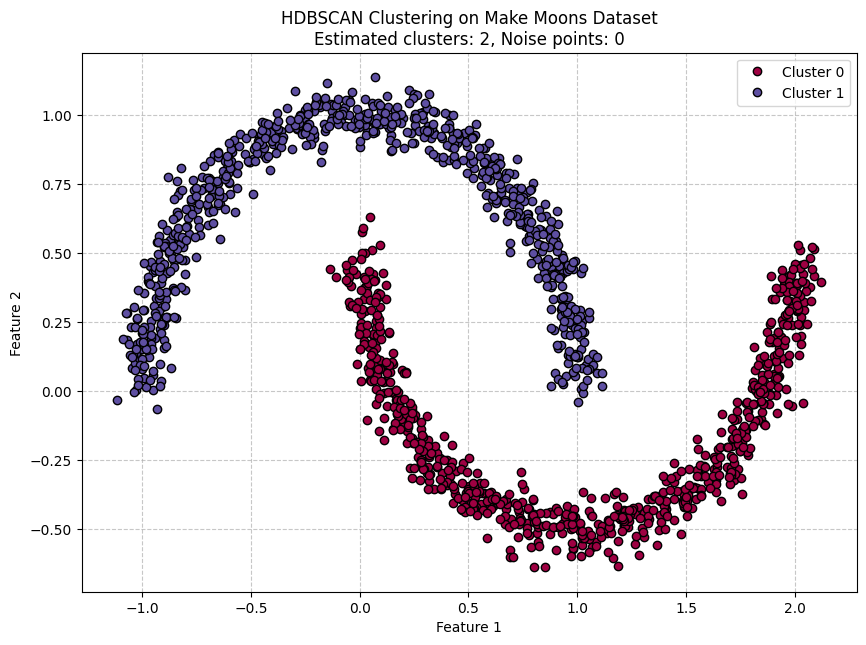

In [5]:

# 4. Visualize the results
plt.figure(figsize=(10, 7))

# Get unique labels
unique_labels = set(labels)

# Choose a colormap for clusters
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6, label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title(f'HDBSCAN Clustering on Make Moons Dataset\nEstimated clusters: {n_clusters}, Noise points: {n_noise}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [7]:

# You can also access the probabilities of points belonging to their assigned cluster
# strengths = clusterer.probabilities_
# print("\nFirst 10 cluster membership probabilities:", strengths[:10])